In [ ]:
#구글 드라이브 마운트
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 데이터 확인

In [ ]:
!unzip -qq /content/drive/MyDrive/테스트영상.zip

In [ ]:
import os
import numpy as np
import cv2
from matplotlib import pyplot as plt

In [ ]:
img_path = '/content/MAH02945/MAH02945_1.jpg'

json_path = '/content/MAH02945/MAH02945_1.json'

In [ ]:
img = cv2.imread(img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

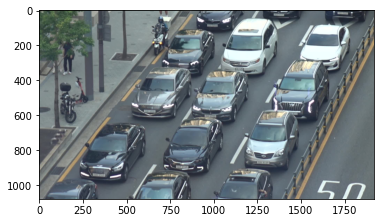

In [ ]:
plt.imshow(img)

In [ ]:
import json
from pprint import pprint 
with open(json_path) as data_file:
  local = json.load(data_file)

pprint(local)

{'fillColor': [255, 0, 0, 64],
 'flags': {},
 'imageData': None,
 'imageHeight': 1080,
 'imagePath': 'MAH02945_1.jpg',
 'imageWidth': 1920,
 'lineColor': [0, 255, 0, 128],
 'shapes': [{'fill_color': None,
             'flags': {},
             'label': 'car',
             'line_color': None,
             'points': [[14, 963], [335, 1080]],
             'shape_type': 'rectangle'},
            {'fill_color': None,
             'flags': {},
             'label': 'car',
             'line_color': None,
             'points': [[227, 650], [618, 977]],
             'shape_type': 'rectangle'},
            {'fill_color': None,
             'flags': {},
             'label': 'car',
             'line_color': None,
             'points': [[504, 919], [880, 1080]],
             'shape_type': 'rectangle'},
            {'fill_color': None,
             'flags': {},
             'label': 'car',
             'line_color': None,
             'points': [[525, 323], [879, 624]],
             'shape_type

In [ ]:
point_list = local['shapes'][0]['points']
point_list = sum(point_list, [])
point_list

[14, 963, 335, 1080]

In [ ]:
cropped_img = img[point_list[1]:point_list[3], point_list[0]: point_list[2]]

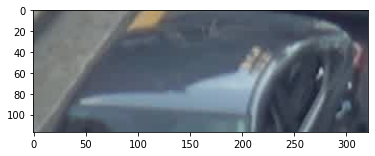

In [ ]:
plt.imshow(cropped_img)

# 테스트 데이터 만들기 RUN

## 만드는 코드 간략 설명
- test 데이터를 3가지로 분류했습니다 (crop된 이미지의 좌표를 이용해서 만들었습니다)
- y축 길이가 x축 길이에 비해 작은경우 즉 이미지가 너무 작아서 의미 없는 test 데이터 셋을 코드상에서 제거 시키려고 노력했습니다
- good, normal, bad
- good은 가장 이상적인 데이터
- normal은 애매한 데이터
- bad는 나쁜 데이터
- 3가지로 분류 후 폴더에 저장하였습니다

In [ ]:
import os
import cv2
 
path_dir1 = '/content/MAH02939'
path_dir2 = '/content/MAH02945'
path_dir3 = '/content/MAH02950'

img_list = []
json_list = []
file_list = os.listdir(path_dir3)
for f in file_list:
  if f.endswith('jpg'):
    img_list.append(f)
  elif f.endswith('json'):
    json_list.append(f)

In [ ]:
import natsort

# 정렬
img_list = natsort.natsorted(img_list)
json_list = natsort.natsorted(json_list)

In [ ]:
img_list[:10]

['MAH02950_1.jpg',
 'MAH02950_2.jpg',
 'MAH02950_3.jpg',
 'MAH02950_4.jpg',
 'MAH02950_5.jpg',
 'MAH02950_6.jpg',
 'MAH02950_7.jpg',
 'MAH02950_8.jpg',
 'MAH02950_9.jpg',
 'MAH02950_10.jpg']

In [ ]:
json_list[:10]

['MAH02950_1.json',
 'MAH02950_2.json',
 'MAH02950_3.json',
 'MAH02950_4.json',
 'MAH02950_5.json',
 'MAH02950_6.json',
 'MAH02950_7.json',
 'MAH02950_8.json',
 'MAH02950_9.json',
 'MAH02950_10.json']

In [ ]:
!mkdir MAH02939_crop
!mkdir MAH02945_crop
!mkdir MAH02950_crop

!mkdir MAH02939_crop/good
!mkdir MAH02939_crop/normal
!mkdir MAH02939_crop/bad

!mkdir MAH02945_crop/good
!mkdir MAH02945_crop/normal
!mkdir MAH02945_crop/bad

!mkdir MAH02950_crop/good
!mkdir MAH02950_crop/normal
!mkdir MAH02950_crop/bad



mkdir: cannot create directory ‘MAH02939_crop’: File exists
mkdir: cannot create directory ‘MAH02945_crop’: File exists
mkdir: cannot create directory ‘MAH02950_crop’: File exists
mkdir: cannot create directory ‘MAH02939_crop/good’: File exists
mkdir: cannot create directory ‘MAH02939_crop/normal’: File exists
mkdir: cannot create directory ‘MAH02939_crop/bad’: File exists
mkdir: cannot create directory ‘MAH02945_crop/good’: File exists
mkdir: cannot create directory ‘MAH02945_crop/normal’: File exists
mkdir: cannot create directory ‘MAH02945_crop/bad’: File exists
mkdir: cannot create directory ‘MAH02950_crop/good’: File exists
mkdir: cannot create directory ‘MAH02950_crop/normal’: File exists
mkdir: cannot create directory ‘MAH02950_crop/bad’: File exists


In [ ]:
PATH = path_dir3+'/'

def get_crop_list(j_list,i_list):
  with open(PATH + j_list) as data_file:
    local = json.load(data_file)

  point_len = len(local['shapes']) #각 사진마다 몇개의 차가 있는지 갯수
  img = cv2.imread(PATH + i_list)
  img = cv2.cvtColor (img, cv2.COLOR_BGR2RGB) # BFR to RGB 해야 제대로 된 색갈

  good_list=[]
  normal_list=[]
  bad_list=[]

  for i in range(point_len):
    point_list = local['shapes'][i]['points']
    point_list = sum(point_list, []) #1차원 리스트로 변경
    cropped_img = img[point_list[1]:point_list[3], point_list[0]: point_list[2]] #y1, y2, x1, x2
    if  (point_list[3] - point_list[1]) / (point_list[2]-point_list[0]) > 0.6:
      good_list.append(cropped_img)
    elif (point_list[3] - point_list[1]) / (point_list[2]-point_list[0]) > 0.45:
      normal_list.append(cropped_img)
    else:
      bad_list.append(cropped_img)
  return good_list, normal_list, bad_list



In [ ]:
print(len(json_list))
print(len(img_list))

1771
1792


In [ ]:
from PIL import Image
save_path_dir1 = '/content/MAH02939_crop/'
save_path_dir2 = '/content/MAH02945_crop/'
save_path_dir3 = '/content/MAH02950_crop/'

for j, i in zip(json_list, img_list):
  good_list, normal_list, bad_list = get_crop_list(j,i)
  
  for n,c in enumerate(good_list):
    pil_image=Image.fromarray(c)
    pil_image.save(f"{save_path_dir3}good/{i}{n}.jpg")

  for n,c in enumerate(normal_list):
    pil_image=Image.fromarray(c)
    pil_image.save(f"{save_path_dir3}normal/{i}{n}.jpg")

  for n,c in enumerate(bad_list):
    pil_image=Image.fromarray(c)
    pil_image.save(f"{save_path_dir3}bad/{i}{n}.jpg")

In [ ]:
f_list = os.listdir('/content/MAH02950_crop/good/')

In [ ]:
f_list

In [ ]:
!zip  -r /content/MAH02939_crop.zip /content/MAH02939_crop/
!zip  -r /content/MAH02945_crop.zip /content/MAH02945_crop/
!zip  -r /content/MAH02950_crop.zip /content/MAH02950_crop/

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  adding: content/MAH02950_crop/good/MAH02950_1033.jpg3.jpg (deflated 1%)
  adding: content/MAH02950_crop/good/MAH02950_1771.jpg2.jpg (deflated 1%)
  adding: content/MAH02950_crop/good/MAH02950_177.jpg2.jpg (deflated 1%)
  adding: content/MAH02950_crop/good/MAH02950_1265.jpg2.jpg (deflated 3%)
  adding: content/MAH02950_crop/good/MAH02950_299.jpg5.jpg (deflated 1%)
  adding: content/MAH02950_crop/good/MAH02950_313.jpg1.jpg (deflated 1%)
  adding: content/MAH02950_crop/good/MAH02950_971.jpg1.jpg (deflated 2%)
  adding: content/MAH02950_crop/good/MAH02950_964.jpg0.jpg (deflated 6%)
  adding: content/MAH02950_crop/good/MAH02950_3.jpg0.jpg (deflated 1%)
  adding: content/MAH02950_crop/good/MAH02950_804.jpg1.jpg (deflated 1%)
  adding: content/MAH02950_crop/good/MAH02950_1510.jpg2.jpg (deflated 1%)
  adding: content/MAH02950_crop/good/MAH02950_1406.jpg4.jpg (deflated 1%)
  adding: content/MAH02950_crop/good/MAH02950_1375.jpg4.jpg (deflated 1%)
  adding: c

In [ ]:
from google.colab import files
files.download('/content/MAH02939_crop.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('/content/MAH02945_crop.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
from google.colab import files
files.download('/content/MAH02950_crop.zip')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>